In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def load_dataset():
    """ Reads dataset csv and returns pandas dataframe """
    
    filepath = "Hitters_Adjusted_Salary.csv"

    df = pd.read_csv(filepath, encoding="utf-8", low_memory=False)
    
    return df

In [3]:
def clean_dataset(a_df):
    """ Returns deduped, na-dropped, index-reset dataframe """    
    
    a_df = a_df.drop_duplicates()   
        
    a_df = a_df.dropna()
    
    a_df = a_df.drop(["Unnamed: 0", "teamID", "lgID", "salary", "PO", "A", "E", "DP"], axis=1)
        
    a_df = a_df.reset_index(drop=True)
    
    return a_df   

In [4]:
def rename_columns(a_df):
    """ Returns dataframe with meaningful column names """    
    
    abbr_dict = {"GS": "games_started", "InnOuts": "inning_outs", "G": "games_played", "AB": "at_bats",\
                "R": "runs", "H": "hits", "2B": "doubles", "3B": "triples", "HR": "home_runs",\
                "RBI": "runs_batted_in", "SB": "stolen_bases", "CS": "caught_stealing", "BB": "base_on_balls",\
                "SO": "strike_outs", "IBB": "intentional_walks", "HBP": "hit_by_pitch", "SH": "sacrifice_hits",\
                "SF": "sacrifice_flies", "GIDP": "ground_into_double_play"}
    
    a_df = a_df.rename(columns=abbr_dict)
    
    return a_df   

In [5]:
def examine_dataset(a_df):
    """ Provides summary info and visualizations of dataset """
    
    print(a_df.info())
           
    print(f'\n\nADJ SALARY VALUE COUNTS: \n {a_df["ADJ Salary"].value_counts()}\n\n')
    
    a_df.hist(figsize = (15, 15))  
    
    sns.PairGrid(a_df[["hits", "runs_batted_in", "stolen_bases", "runs", "ground_into_double_play"]]).map_upper(plt.scatter) # just scatter plot the float values

In [6]:
def scale_dataset(a_df):
    """ Returns dataframe with target column removed, data scaled with standard scaler, data normalized, and labels """
    
    salary_labels = a_df["ADJ Salary"]    
    no_target_df = a_df.drop(columns=["ADJ Salary"])
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(no_target_df)    
    print(f"SHAPE AFTER SCALING: {scaled_data.shape}")

    normalized_data = normalize(no_target_df)    
    print(f"SHAPE AFTER NORMALIZING: {normalized_data.shape}")

    return no_target_df, scaled_data, normalized_data, salary_labels

In [7]:
loaded_df = load_dataset()

In [8]:
clean_df = clean_dataset(loaded_df)

In [9]:
clean_df = rename_columns(clean_df)

In [10]:
clean_df.head(10)

,yearID,playerID,ADJ Salary,games_started,inning_outs,games_played,at_bats,runs,hits,doubles,triples,home_runs,runs_batted_in,stolen_bases,caught_stealing,base_on_balls,strike_outs,intentional_walks,hit_by_pitch,sacrifice_hits,sacrifice_flies,ground_into_double_play
0,1985,benedbr01,1.310892e+06,67.0,1698.0,70,208,12,42,6,0,0,20.0,0.0,1.0,22,12.0,1.0,1.0,4.0,2.0,8.0
1,1985,ceronri01,1.503317e+06,76.0,2097.0,96,282,15,61,9,0,3,25.0,0.0,3.0,29,25.0,1.0,1.0,0.0,4.0,15.0
2,1985,chambch01,1.924245e+06,27.0,814.0,101,170,16,40,7,0,3,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
3,1985,harpete01,6.013267e+05,124.0,3299.0,138,492,58,130,15,2,17,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
4,1985,hornebo01,3.607960e+06,125.0,3196.0,130,483,61,129,25,3,27,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
5,1985,hubbagl01,1.094415e+06,130.0,3425.0,142,439,51,102,21,0,5,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
6,1985,mumphje01,1.864113e+06,113.0,3009.0,130,444,52,123,25,2,8,61.0,6.0,7.0,37,57.0,8.0,0.0,1.0,6.0,9.0
7,1985,murphda05,3.908623e+06,161.0,4264.0,162,616,118,185,32,2,37,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0
8,1985,oberkke01,1.483273e+06,113.0,3041.0,134,412,30,112,19,4,3,35.0,1.0,2.0,51,38.0,6.0,6.0,1.0,2.0,10.0
9,1985,perryge01,2.886368e+05,50.0,1325.0,110,238,22,51,5,0,3,13.0,9.0,5.0,23,28.0,1.0,0.0,0.0,1.0,7.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15023 entries, 0 to 15022
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yearID                   15023 non-null  int64  
 1   playerID                 15023 non-null  object 
 2   ADJ Salary               15023 non-null  float64
 3   games_started            15023 non-null  float64
 4   inning_outs              15023 non-null  float64
 5   games_played             15023 non-null  int64  
 6   at_bats                  15023 non-null  int64  
 7   runs                     15023 non-null  int64  
 8   hits                     15023 non-null  int64  
 9   doubles                  15023 non-null  int64  
 10  triples                  15023 non-null  int64  
 11  home_runs                15023 non-null  int64  
 12  runs_batted_in           15023 non-null  float64
 13  stolen_bases             15023 non-null  float64
 14  caught_stealing       

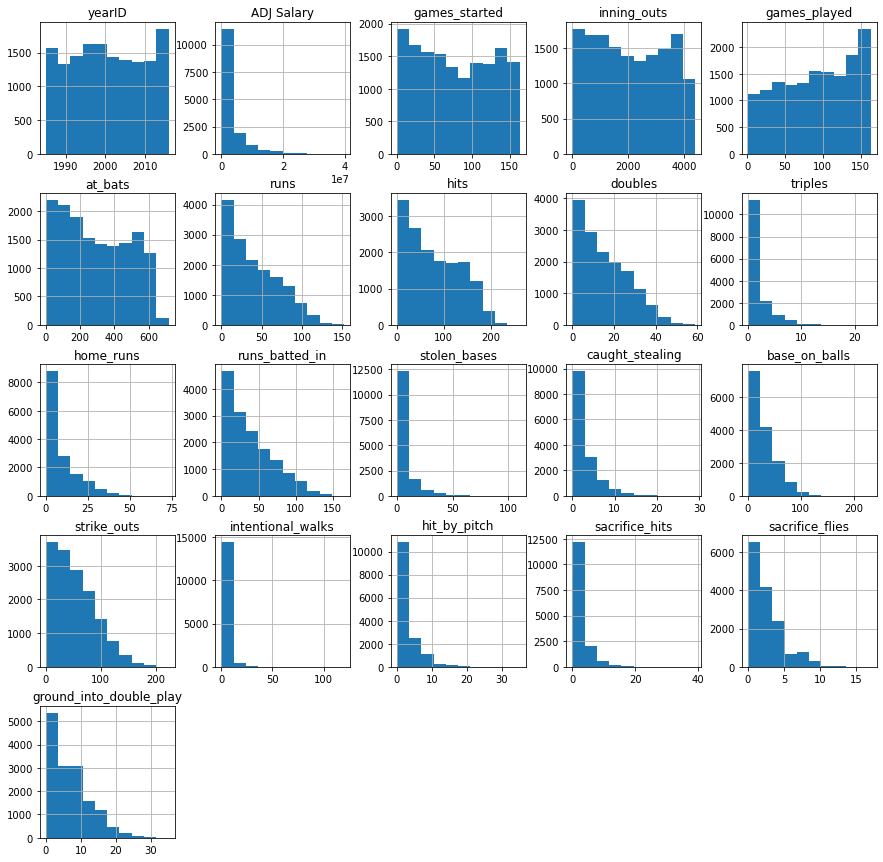

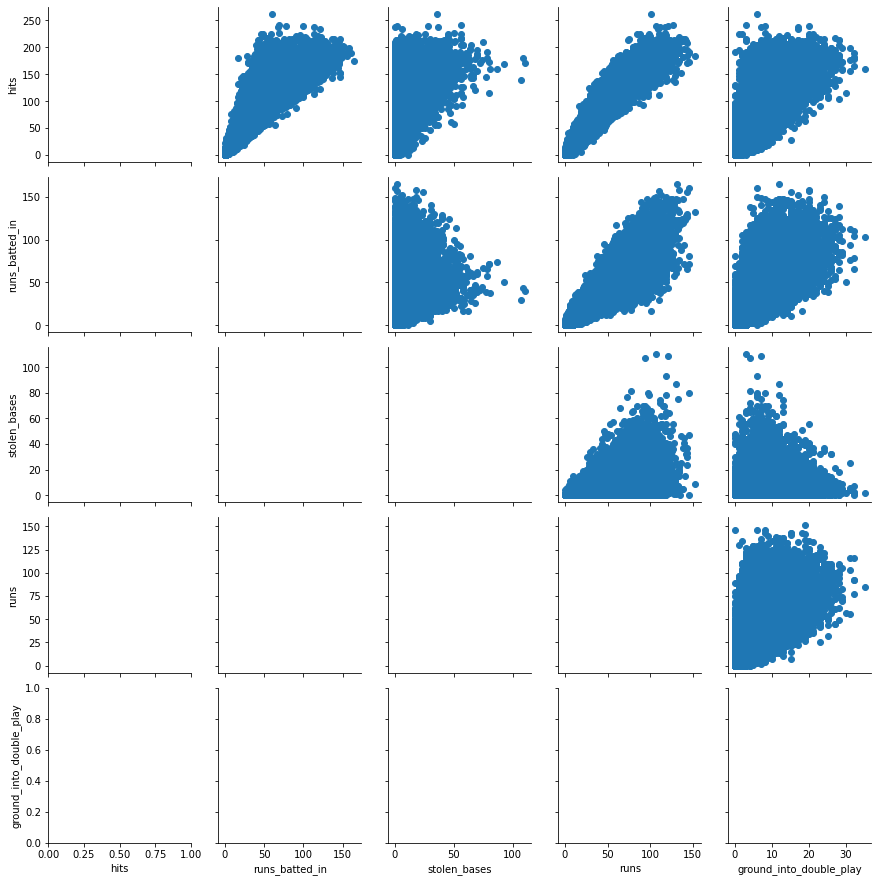

In [11]:
examine_dataset(clean_df)

In [ ]:
year_player_group = clean_df.groupby(["yearID", "playerID"])

In [ ]:
clean_df["ADJ Salary"] = clean_df["ADJ Salary"].astype("int").round()

In [ ]:
clean_df["ADJ Salary"]

In [ ]:
year_player_group["ADJ Salary"].mean()

In [ ]:
examine_dataset(clean_df)

In [ ]:
# Assign X and y

X = df.drop(["ADJ Salary"], axis=1)
y = df["ADJ Salary"]

In [ ]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

In [ ]:
# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression().fit(X_train_scaled, y_train)

In [ ]:
# Score the model

print(f"Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")